In [1]:
import dill as pickle
import os
import numpy as np
import pandas as pd
from tqdm import tqdm, tnrange, tqdm_notebook

save_folder = 'figures/'

def load_dfs(task_id_list, results_folder, experiments):
    
    all_dfs = {}
    for taskidi in tnrange(len(task_id_list)):
        taskid = task_id_list[taskidi]
        for run in range(5):

            for exp_name in experiments:
                save_folder = f"{results_folder}/{exp_name}_{taskid}_{run}"
                file = f"{save_folder}/evaluated_individuals.pkl"
                if os.path.exists(file):
                    df = pickle.load(open(file, "rb"))
                    df.drop(["Individual"],axis=1, inplace=True)
                    
                    if exp_name not in all_dfs:
                        all_dfs[exp_name] = {}
                    if taskid not in all_dfs[exp_name]:
                        all_dfs[exp_name][taskid] = {}
                    all_dfs[exp_name][taskid][run] = df

    return all_dfs


binary_task_ids = [189865,
                    167200,
                    126026,
                    189860,
                    75127,
                    189862,
                    75105,
                    168798,
                    126029,
                    168796,
                    167190,
                    189866,
                    167104,
                    167083,
                    167184,
                    126025,
                    75097, 
                    167181,
                    168797,
                    189861,
                    167161,
                    167149,
                    ]

multiclass_task_ids  = [
                            168794,
                            189873,
                            167152,
                            189909,
                            189872,
                            168795, #This one has fewer than 10 instances of a class
                            167185,
                            189905,
                            189874,
                            75193,
                            167168,
                            168793,
                            189906,
                            167201,
                            189908,
                            168792,
                            189871
                            ]

multiclass_exps = [ 'tpot2_untimed_30_gen_neg_log_loss']


binary_exps = ['tpot2_untimed_30_gen_roc_auc']


binary_dfs = {}
multiclass_dfs = {}

binary_dfs = load_dfs(binary_task_ids, 'results/results_binary',binary_exps)
multiclass_dfs = load_dfs(multiclass_task_ids, 'results/results_multi', multiclass_exps)


/tmp/ipykernel_15791/1249153959.py:12: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for taskidi in tnrange(len(task_id_list)):


  0%|          | 0/22 [00:00<?, ?it/s]

/tmp/ipykernel_15791/1249153959.py:12: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for taskidi in tnrange(len(task_id_list)):


  0%|          | 0/17 [00:00<?, ?it/s]

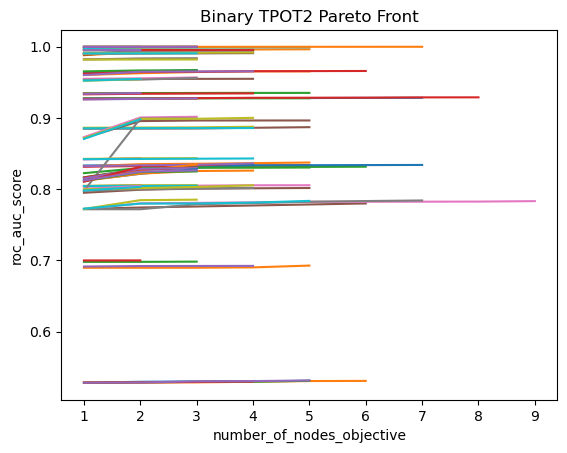

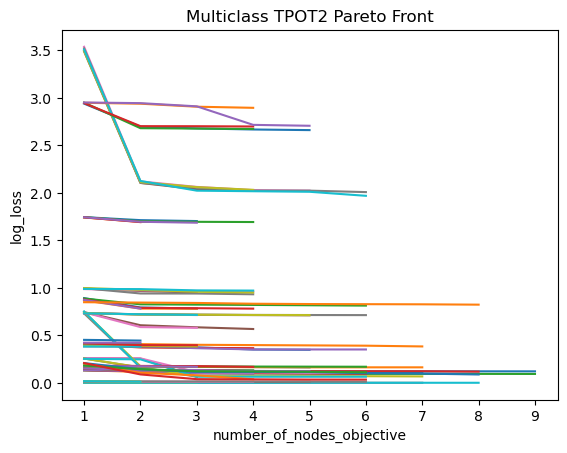

In [2]:
import matplotlib.pyplot as plt
import tpot2
def plot_pareto_fronts(all_dfs,taskids,exp_name,x_col,y_col,name,save_folder=None):
    x_list = []
    y_list = []
    plt.figure()
    for taskid in taskids:
        if taskid not in all_dfs[exp_name]:
            continue
        for run in range(5):
            if run not in all_dfs[exp_name][taskid]:
                continue
            df = all_dfs[exp_name][taskid][run]
            try:
                df = df[~df[[x_col,y_col]].isna().any(axis=1)]
                df = df[~df[[x_col,y_col]].isin(["TIMEOUT","INVALID"]).any(axis=1)]
            except:
                pass

            df = df[df["Pareto_Front"] == 1]

            if y_col == "log_loss":
                df[y_col] = -df[y_col]

            x = df[x_col].values
            y = df[y_col].values

            #sort by x
            x_arg = np.argsort(x)
            x = x[x_arg]
            y = y[x_arg]

            x_list.append(x)
            y_list.append(y)

            plt.plot(x,y, label=f"{taskid}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(name)
    #plt.legend()
    

    if save_folder is not None:
        plt.savefig(f'{save_folder}/{name}_pareto.svg', bbox_inches='tight')
        plt.savefig(f'{save_folder}/{name}_pareto.png', bbox_inches='tight')
    
    plt.show()
    plt.close()
    
plot_pareto_fronts(binary_dfs,binary_task_ids,'tpot2_untimed_30_gen_roc_auc','number_of_nodes_objective','roc_auc_score', save_folder=save_folder,name='Binary TPOT2 Pareto Front')
plot_pareto_fronts(multiclass_dfs,multiclass_task_ids,'tpot2_untimed_30_gen_neg_log_loss','number_of_nodes_objective','log_loss', save_folder=save_folder,name='Multiclass TPOT2 Pareto Front')

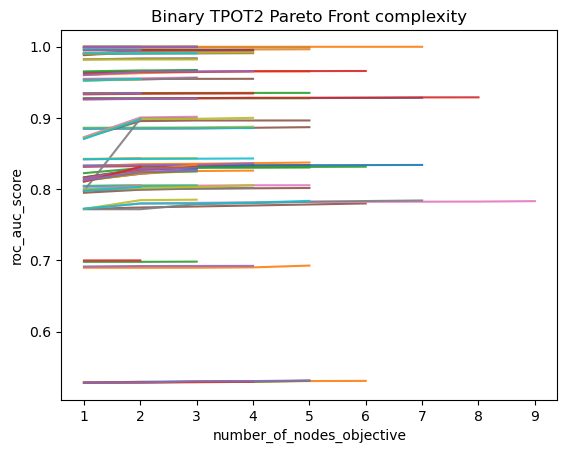

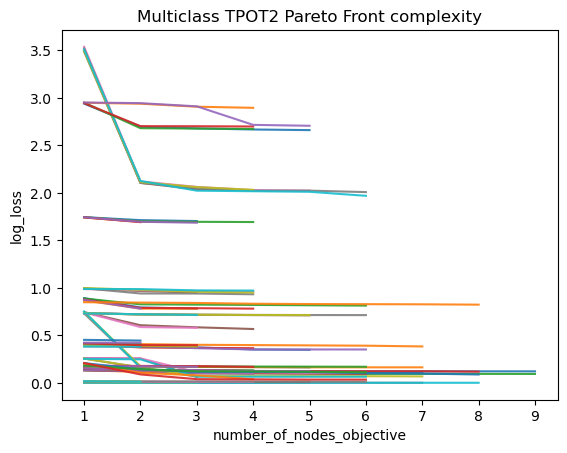

In [3]:
import tpot2
def plot_pareto_fronts(all_dfs,taskids,exp_name,x_col,y_col,name,save_folder=None):
    x_list = []
    y_list = []
    plt.figure()
    for taskid in taskids:
        if taskid not in all_dfs[exp_name]:
            continue
        for run in range(5):
            if run not in all_dfs[exp_name][taskid]:
                continue
            df = all_dfs[exp_name][taskid][run]
            try:
                df = df[~df[[x_col,y_col]].isna().any(axis=1)]
                df = df[~df[[x_col,y_col]].isin(["TIMEOUT","INVALID"]).any(axis=1)]
            except:
                pass

            df = df[df["Pareto_Front"] == 1]

            if y_col == "log_loss":
                df[y_col] = -df[y_col]

            x = df[x_col].values
            y = df[y_col].values

            #sort by x
            x_arg = np.argsort(x)
            x = x[x_arg]
            y = y[x_arg]

            x_list.append(x)
            y_list.append(y)

            plt.plot(x,y, label=f"{taskid}",alpha=0.9)


    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(name)
    #plt.legend()

    if save_folder is not None:
        plt.savefig(f'{save_folder}/{name}_pareto.svg', bbox_inches='tight')
        plt.savefig(f'{save_folder}/{name}_pareto.png', bbox_inches='tight')

    plt.show()
    plt.close()

plot_pareto_fronts(binary_dfs,binary_task_ids,'tpot2_untimed_30_gen_roc_auc','number_of_nodes_objective','roc_auc_score', save_folder=save_folder,name='Binary TPOT2 Pareto Front complexity')
plot_pareto_fronts(multiclass_dfs,multiclass_task_ids,'tpot2_untimed_30_gen_neg_log_loss','number_of_nodes_objective','log_loss', save_folder=save_folder,name='Multiclass TPOT2 Pareto Front complexity')

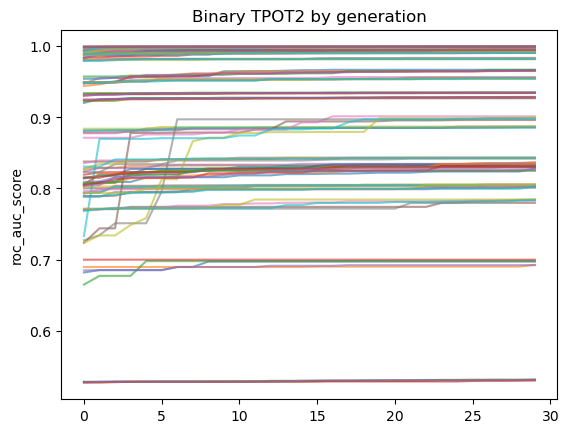

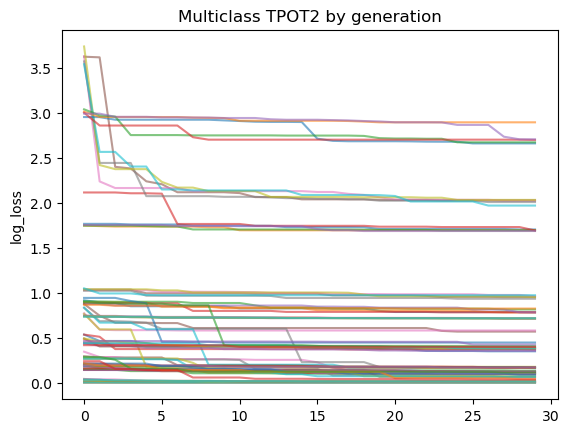

In [4]:
def plot_best_score_per_generation(all_dfs,taskids,exp_name,y_col,name,save_folder=None):
    x_list = []
    y_list = []
    plt.figure()
    for taskid in taskids:
        if taskid not in all_dfs[exp_name]:
            continue
        for run in range(5):
            if run not in all_dfs[exp_name][taskid]:
                continue
            df = all_dfs[exp_name][taskid][run]
            df = df[~df[[y_col]].isna().any(axis=1)]
            df = df[~df[[y_col]].isin(["TIMEOUT","INVALID"]).any(axis=1)]

            

            #get max per generation
            df = df.groupby("Generation")[y_col].max().reset_index()

            x = df["Generation"].values
            y = df[y_col].values

            #sort by x
            x_arg = np.argsort(x)
            x = x[x_arg]
            y = y[x_arg]

            #turn y into cumulative max
            y = np.maximum.accumulate(y)

            if y_col == "log_loss":
                y = -y

            x_list.append(x)
            y_list.append(y)

            plt.plot(x,y, label=f"{taskid}", alpha=.6)
    plt.ylabel(y_col)
    plt.title(name)
    #plt.legend()
    

    if save_folder is not None:
        plt.savefig(f'{save_folder}/{name}_.svg', bbox_inches='tight')
        plt.savefig(f'{save_folder}/{name}_.png', bbox_inches='tight')
        
    plt.show()
    plt.close()



plot_best_score_per_generation(binary_dfs,binary_task_ids,'tpot2_untimed_30_gen_roc_auc','roc_auc_score', save_folder=save_folder,name='Binary TPOT2 by generation')
plot_best_score_per_generation(multiclass_dfs,multiclass_task_ids,'tpot2_untimed_30_gen_neg_log_loss','log_loss', save_folder=save_folder,name='Multiclass TPOT2 by generation')